# FACTOR ANALYSIS ASSIGNMENT
## CLIENT 2: Teaching Statistics Questionnaire Factor Analysis
### MARISSA MCKEE ADTA 5120

You have been hired as a consultant by three clients to perform several analyses. Complete the brief reports to the client in a concise professional manner. It is suggested that you also include an appendix for your supervisor with the relevant SPSS output outlining your findings and analysis. Your supervisor will also like to see the SPSS *.spv file showing your executed SPSS analysis.

#### Client #2: Teaching Statistics Questionnaire Factor Analysis (33 points)

UNT wants to revise its Teaching of Statistics questionnaire which is based on Blands’s theory that good researchers should have four characteristics: 

(1) a profound love of statistics; 

(2) an enthusiasm for experimental design; 

(3) a love of teaching; and 

(4) a complete absence of normal interpersonal skills. These characteristics should be related (i.e., correlated). 

The ‘Teaching of Statistics Questionnaire' (TOSQ) already exists. They gave this questionnaire to 239 research methods lecturers around the world to see if it supported Bland’s theory. The data is in TOSQ.sav . Conduct a factor analysis (with appropriate rotation) to see the factor structure.  Make sure to evaluate the sampling adequacy, perform a test of sphericity. 

- EXTRA CREDIT: For 5 points extra credit, evaluate the reliability of your final factors.


In [1]:
import pandas as pd
import pyreadstat
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [2]:
# Read TOSQ.sav 
df, meta = pyreadstat.read_sav("TOSQ.sav")
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q22,q23,q24,q25,q26,q27,q28,Rq2,Rq18,Rq6
0,5.0,4.0,5.0,6.0,3.0,5.0,6.0,5.0,6.0,3.0,...,5.0,4.0,7.0,5.0,5.0,4.0,5.0,6.0,7.0,5.0
1,5.0,6.0,5.0,6.0,4.0,5.0,5.0,5.0,5.0,3.0,...,5.0,4.0,6.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0
2,4.0,6.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,...,2.0,2.0,1.0,3.0,3.0,2.0,2.0,4.0,7.0,6.0
3,4.0,5.0,5.0,5.0,2.0,5.0,6.0,2.0,4.0,5.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,5.0,8.0,5.0
4,4.0,4.0,3.0,5.0,1.0,4.0,5.0,4.0,6.0,4.0,...,6.0,2.0,2.0,4.0,3.0,4.0,1.0,6.0,6.0,6.0


In [3]:
# View the features in the dataframe
df.columns

Index(['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'Rq2', 'Rq18', 'Rq6'],
      dtype='object')

In [4]:
# Check for nulls
df.isnull().any()

q1      False
q2       True
q3       True
q4      False
q5      False
q6      False
q7      False
q8      False
q9      False
q10     False
q11      True
q12      True
q13     False
q14     False
q15      True
q16     False
q17     False
q18      True
q19      True
q20     False
q21      True
q22     False
q23     False
q24     False
q25     False
q26     False
q27     False
q28     False
Rq2      True
Rq18     True
Rq6     False
dtype: bool

In [5]:
# Drop rows with missing values
df.dropna(inplace=True)

In [6]:
# Sanity check 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 231 entries, 0 to 238
Data columns (total 31 columns):
q1      231 non-null float64
q2      231 non-null float64
q3      231 non-null float64
q4      231 non-null float64
q5      231 non-null float64
q6      231 non-null float64
q7      231 non-null float64
q8      231 non-null float64
q9      231 non-null float64
q10     231 non-null float64
q11     231 non-null float64
q12     231 non-null float64
q13     231 non-null float64
q14     231 non-null float64
q15     231 non-null float64
q16     231 non-null float64
q17     231 non-null float64
q18     231 non-null float64
q19     231 non-null float64
q20     231 non-null float64
q21     231 non-null float64
q22     231 non-null float64
q23     231 non-null float64
q24     231 non-null float64
q25     231 non-null float64
q26     231 non-null float64
q27     231 non-null float64
q28     231 non-null float64
Rq2     231 non-null float64
Rq18    231 non-null float64
Rq6     231 non-null floa

In [7]:
# View output 
df.head()

,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,...,q22,q23,q24,q25,q26,q27,q28,Rq2,Rq18,Rq6
0,5.0,4.0,5.0,6.0,3.0,5.0,6.0,5.0,6.0,3.0,...,5.0,4.0,7.0,5.0,5.0,4.0,5.0,6.0,7.0,5.0
1,5.0,6.0,5.0,6.0,4.0,5.0,5.0,5.0,5.0,3.0,...,5.0,4.0,6.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0
2,4.0,6.0,2.0,2.0,2.0,4.0,2.0,2.0,2.0,1.0,...,2.0,2.0,1.0,3.0,3.0,2.0,2.0,4.0,7.0,6.0
3,4.0,5.0,5.0,5.0,2.0,5.0,6.0,2.0,4.0,5.0,...,4.0,3.0,3.0,3.0,4.0,3.0,3.0,5.0,8.0,5.0
4,4.0,4.0,3.0,5.0,1.0,4.0,5.0,4.0,6.0,4.0,...,6.0,2.0,2.0,4.0,3.0,4.0,1.0,6.0,6.0,6.0


In [8]:
# Bartletts test: checks for intercorrelation among variables
chi_square_value,p_value=calculate_bartlett_sphericity(df)
print('Chi square value:',chi_square_value)
print('P value:',p_value)

Chi square value: 26616.578763923004
P value: 0.0


In [9]:
# Kaiser (KMO) test: measures the adequacy of the data for factor analysis
kmo_all,kmo_model=calculate_kmo(df)
print('KMO:',kmo_model)

KMO: 0.8425351612386982


C:\Users\mckee\Anaconda3\lib\site-packages\factor_analyzer\utils.py:248: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn('The inverse of the variance-covariance matrix '


In [10]:
# Create factor analysis object to perform factor analysis 
fa = FactorAnalyzer()
fa.fit(df)

# Eigen values 
eigen, vectors = fa.get_eigenvalues()
print('Eigen:',eigen)

Eigen: [ 9.55614647e+00  3.76028326e+00  1.83433760e+00  1.67305663e+00
  1.37231561e+00  1.22623060e+00  1.05659844e+00  9.26015865e-01
  8.81325463e-01  8.15503000e-01  7.70176637e-01  7.11013965e-01
  6.50239982e-01  6.35856514e-01  5.75109781e-01  5.45625899e-01
  5.01451459e-01  4.85337306e-01  4.26072827e-01  3.98570607e-01
  3.64305898e-01  3.40102781e-01  3.11462612e-01  2.94276883e-01
  2.64305146e-01  2.51051427e-01  2.08102529e-01  1.65124794e-01
  1.62738553e-16  8.28231500e-17 -2.19911109e-16]


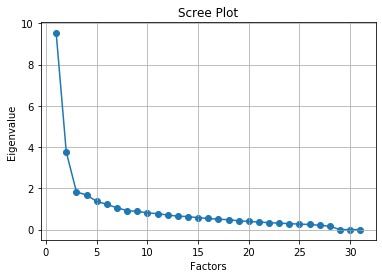

In [11]:
# Create scree plot
plt.scatter(range(1,df.shape[1]+1),eigen)
plt.plot(range(1,df.shape[1]+1),eigen)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(7, rotation="varimax")
fa.fit(df)

FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=7, rotation='varimax',
               rotation_kwargs={}, use_smc=True)

In [33]:
# Get factor loadings
loadings=fa.loadings_

# Visualize as a dataframe
df1 = pd.DataFrame(data=loadings, index=['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11',
       'q12', 'q13', 'q14', 'q15', 'q16', 'q17', 'q18', 'q19', 'q20', 'q21',
       'q22', 'q23', 'q24', 'q25', 'q26', 'q27', 'q28', 'Rq2', 'Rq18', 'Rq6'], 
        columns=["Factor 1","Factor 2","Factor 3","Factor 4","Factor 5","Factor 6","Factor 7"])

df1

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
q1,0.454876,-0.044935,0.497364,0.268611,0.079310,0.165094,0.223624
q2,0.145316,-0.028211,0.110149,0.929068,0.257803,0.162026,0.081091
q3,0.198855,0.369092,0.557367,0.040595,0.032559,-0.027671,0.043910
q4,0.165964,0.290389,0.558037,0.112586,0.105114,0.193621,0.072879
q5,0.254544,-0.000586,0.073997,0.141238,0.037248,0.062257,0.597914
q6,0.129107,-0.046408,0.081892,0.228787,0.952264,0.106164,0.036394
q7,0.230995,0.488324,0.336030,0.036574,-0.017320,-0.074856,0.009306
q8,0.595434,0.368429,0.362865,0.104425,0.051439,0.117461,0.098570
q9,0.476171,0.062111,0.456661,0.216881,0.150917,0.227111,0.180151
q10,0.395600,0.092963,0.107497,0.134775,0.238808,0.181561,0.128139


In [32]:
# Get variance of each factors
variance=fa.get_factor_variance()

# Visualize as a dataframe
df2 = pd.DataFrame(data=variance, index=['SS Loadings', 'Proportion Variance', 'Cumulative Variance'], 
        columns=["Factor 1","Factor 2","Factor 3","Factor 4","Factor 5","Factor 6","Factor 7"])

df2

,Factor 1,Factor 2,Factor 3,Factor 4,Factor 5,Factor 6,Factor 7
SS Loadings,4.527772,2.891062,2.665695,2.177161,2.148711,2.039274,1.833526
Proportion Variance,0.146057,0.093260,0.085990,0.070231,0.069313,0.065783,0.059146
Cumulative Variance,0.146057,0.239317,0.325307,0.395538,0.464852,0.530635,0.589781


In [29]:
# Display factors
# pd.DataFrame.from_records(loadings)